# Case Study: Regression Analysis
Ashwin John Chempolil, <br>
Hemanth Reddy Musuku, <br>
Raja Muthu, <br>
Sowmya Shree Nagaraju <br>

In [1]:
# Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [3]:
# reading the board_games.csv 
housing = pd.read_csv('housing.csv', error_bad_lines=False)
# printing out first few rows of the data
housing.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Removing rows that contain missing values
housing.dropna(axis=0,inplace=True)

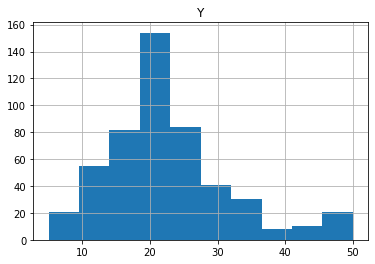

In [4]:
housing.hist('Y');

In [5]:
print (f'The standard deviation of average_rating column : {housing["Y"].std():.3f}')

The standard deviation of average_rating column : 9.197


In [6]:
print (f'The mean of average_rating column : {housing["Y"].mean():.3f}')

The mean of average_rating column : 22.533


From the plot, and the values of the mean and standard deviation, it is apparent that there are almost no outliers here.Hence, we would recommend using SSE or RMSE as error metric, as there are no significant outliers that might have an adverse effect on the fit of the model.

In [7]:
# Use the corr method on numeric_columns to compute correlations between columns. Assign the result to correlations 
correlations = housing.corr()
correlations['Y']

X1    -0.388304
X2     0.360445
X3    -0.483725
X4     0.175260
X5    -0.427321
X6     0.695360
X7    -0.376955
X8     0.249929
X9    -0.381626
X10   -0.468536
X11   -0.507787
X12    0.333461
X13   -0.737663
Y      1.000000
Name: Y, dtype: float64

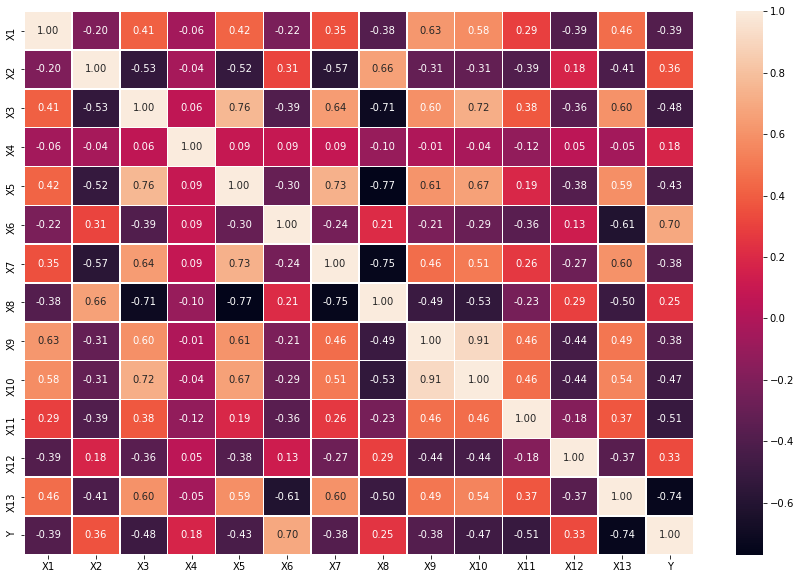

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(correlations,annot=True, fmt = ".2f",linewidths=0.5);

### Model Fitting

In [9]:
def prediction(x_train, x_test, y_train, y_test,model):
    """
    A function to train and returns the RMSE of a given model
    x_train : train data of x
    x_test : test data of x
    y_train : train data of target variable
    y_test : test data of target variable
    model : machine learning model
    """
    # Standardazing
    scaler = StandardScaler()
    X_train_sm = scaler.fit_transform(x_train)
    X_test_sm = scaler.transform(x_test)

    # Fitting model on train data 
    model.fit(X_train_sm,y_train)

    # predicting the test data
    predictions = model.predict(X_test_sm)

    # calculating the root mean squared error
    rmse = mean_squared_error(y_test,predictions,squared=False)
    return rmse

In [10]:
# Using Ordinary Least Squares 
def sm_OLS(x_train, x_test, y_train, y_test):
    """
    Calculates the Ordinary Least squares method using statsmodels.api.OLS()
    x_train : train data of x
    x_test : test data of x
    y_train : train data of target variable
    y_test : test data of target variable
    """
    scaler = StandardScaler()
    X_train_sm = scaler.fit_transform(x_train)
    X_train_sm = sm.add_constant(X_train_sm)
    X_test_sm = scaler.transform(x_test)
    X_test_sm = sm.add_constant(X_test_sm)
    reg = sm.OLS(y_train,X_train_sm).fit()
    predictions = reg.predict(X_test_sm)
    rmse = mean_squared_error(y_test,predictions,squared=False)
    return rmse

In [11]:
def rmse_kfold(kf,model= None,ols=False):
    """
    Calculates and returns the RMSE of KFold cross validation
    kf : KFold split
    model : machine learning model 
    ols : True if its to calculate using statsmodels.api.OLS()
    """
    rmse_kf = []
    for train_index, test_index in kf.split(housing_x):
        X_train, X_test = housing_x.iloc[train_index],housing_x.iloc[test_index]
        y_train, y_test = housing_y.iloc[train_index],housing_y.iloc[test_index]
        if ols:
            rmse_kf.append(sm_OLS(X_train,X_test,y_train,y_test))
        else:
            rmse = prediction(X_train,X_test,y_train,y_test,model)
            rmse_kf.append(rmse)
    return rmse_kf


In [12]:

housing_y = housing.pop("Y")
housing_x = housing

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(housing_x,housing_y,test_size = 0.3,random_state = 2120)

In [14]:
# Initialising the linear regression model
reg = LinearRegression()
print (f'RMSE using linear regression model : {prediction(X_train,X_test,Y_train,Y_test,reg)}')
# Performing 5-cross validation to analyze the model performance using KFold()
kf = KFold(n_splits=5,random_state=2120)
rmse_kf = rmse_kfold(kf,reg)
print (f'Mean RMSE of KFold CV (Linear Regression) : {np.mean(np.array(rmse_kf))}')
print (f'RMSE of KFold CV : {rmse_kf}' )


RMSE using linear regression model : 4.315919371004564
Mean RMSE of KFold CV (Linear Regression) : 5.828659074084096
RMSE of KFold CV : [3.529908899140204, 5.103771709446162, 5.751017544511991, 8.986796869007625, 5.7718003483145015]


C:\Users\Rajam\anaconda3\envs\ana41py38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [15]:
sgd = SGDRegressor(random_state = 2120)
print (f'RMSE using the SGDRegressor() : {prediction(X_train,X_test,Y_train,Y_test,sgd)}')
rmse_kf = rmse_kfold(kf,model=sgd)
print (f'Mean RMSE of KFold CV (SGDRegressor()) : {np.mean(np.array(rmse_kf))}')
print (f'RMSE of KFold CV (SGDRegressor()) : {rmse_kf}' )

RMSE using the SGDRegressor() : 4.309103398182892
Mean RMSE of KFold CV (SGDRegressor()) : 5.758311423233957
RMSE of KFold CV (SGDRegressor()) : [3.4736219644957185, 5.046743634345589, 5.723937422161175, 8.96785701836353, 5.579397076803774]


It seems that the cross validation is yielding slightly worse results than the individual models.

In [16]:
learning_rate = [0.1,0.01,0.001]
tolerance_val = [0.5,0.1,0.01]

for lr in learning_rate:
    for tol in tolerance_val:
        sgd = SGDRegressor(max_iter = 50000, tol = tol,learning_rate = 'constant',eta0 = lr,random_state=2120)
        print (f'For learning rate:{lr} and tolerance value:{tol}, RMSE = {prediction(X_train,X_test,Y_train,Y_test,sgd)}')

For learning rate:0.1 and tolerance value:0.5, RMSE = 1656.5277450451388
For learning rate:0.1 and tolerance value:0.1, RMSE = 1656.5277450451388
For learning rate:0.1 and tolerance value:0.01, RMSE = 1656.5277450451388
For learning rate:0.01 and tolerance value:0.5, RMSE = 4.154920141072803
For learning rate:0.01 and tolerance value:0.1, RMSE = 4.154920141072803
For learning rate:0.01 and tolerance value:0.01, RMSE = 4.154920141072803
For learning rate:0.001 and tolerance value:0.5, RMSE = 4.170183990531805
For learning rate:0.001 and tolerance value:0.1, RMSE = 4.224455023519159
For learning rate:0.001 and tolerance value:0.01, RMSE = 4.285501120974276


It might be that that when the step size is larger, the model is converging at a local minima instead of the global minima, as can be observed when the step size is smaller. With this, it is clear that even though the model may converge faster with a larger step size, it will not necessarily be better.

In [17]:
# Using LassoCV and measuring its RMSE
lasso = LassoCV(cv=5,random_state=2120)
l1_rmse = prediction(X_train,X_test,Y_train,Y_test,lasso)
print (f'RMSE for L1 regularization:{l1_rmse}')

RMSE for L1 regularization:4.308949442049807


In [18]:
# Using RidgeCV and measuring its RMSE
ridge = RidgeCV(cv=5)
l2_rmse = prediction(X_train,X_test,Y_train,Y_test,ridge)
print (f'RMSE for L2 regularization:{l2_rmse}')

RMSE for L2 regularization:4.3058220230347075


From the given observation, ridge performs slightly better than Lasso. We do not feel there is much difference between the two to make a clear distinction, but looking purely at the result, we would prefer to use Ridge over Lasso.

In [19]:
#Random Forest Regressor
ran_forest = RandomForestRegressor(n_estimators = 5, random_state = 2120)
print( f"RMSE of Random Forest Regressor Model : {prediction(X_train,X_test,Y_train,Y_test,ran_forest)}")
# Neural Networks
neu_net = MLPRegressor(random_state=2120, max_iter=500,hidden_layer_sizes=1)
print(f"RMSE of Neural Network Model with 1 hidden layer : {prediction(X_train,X_test,Y_train,Y_test,neu_net)}")

RMSE of Random Forest Regressor Model : 3.08883686165112
RMSE of Neural Network Model with 1 hidden layer : 22.621910963913166


C:\Users\Rajam\anaconda3\envs\ana41py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


From the above results, we can see that Random forest Regressor model performs better than Neural Network Model with 1 hidden layer since RMSE of Random forest Regressor is less than that of Neural Network Model.